<a href="https://colab.research.google.com/github/MeenaCherukuri/AIML-Internship/blob/main/27_5_25_AIML_Internship_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install Plotly (if not already installed)
!pip install plotly

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set default aesthetics
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Step 3: Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Step 4: View the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Basic summary statistics
# Basic descriptive statistics (mean, std, min, max, quartiles)
print("\n📊 Descriptive statistics (numeric features):")
display(df.describe())

# Median for each numeric column
print("\n🧮 Median of each numeric column:")
display(df.median(numeric_only=True))

# Additional statistics: mode and standard deviation
print("\n🎯 Mode of each column:")
display(df.mode().iloc[0])  # Most frequent value for each column

print("\n📏 Standard deviation of numeric columns:")
display(df.std(numeric_only=True))

# Check for missing values
print("\n❗ Missing values per column:")
display(df.isnull().sum())


📊 Descriptive statistics (numeric features):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



🧮 Median of each numeric column:


,0
PassengerId,446.0000
Survived,0.0000
Pclass,3.0000
Age,28.0000
SibSp,0.0000
Parch,0.0000
Fare,14.4542



🎯 Mode of each column:


,0
PassengerId,1
Survived,0.0
Pclass,3.0
Name,"Abbing, Mr. Anthony"
Sex,male
Age,24.0
SibSp,0.0
Parch,0.0
Ticket,1601
Fare,8.05



📏 Standard deviation of numeric columns:


,0
PassengerId,257.353842
Survived,0.486592
Pclass,0.836071
Age,14.526497
SibSp,1.102743
Parch,0.806057
Fare,49.693429



❗ Missing values per column:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


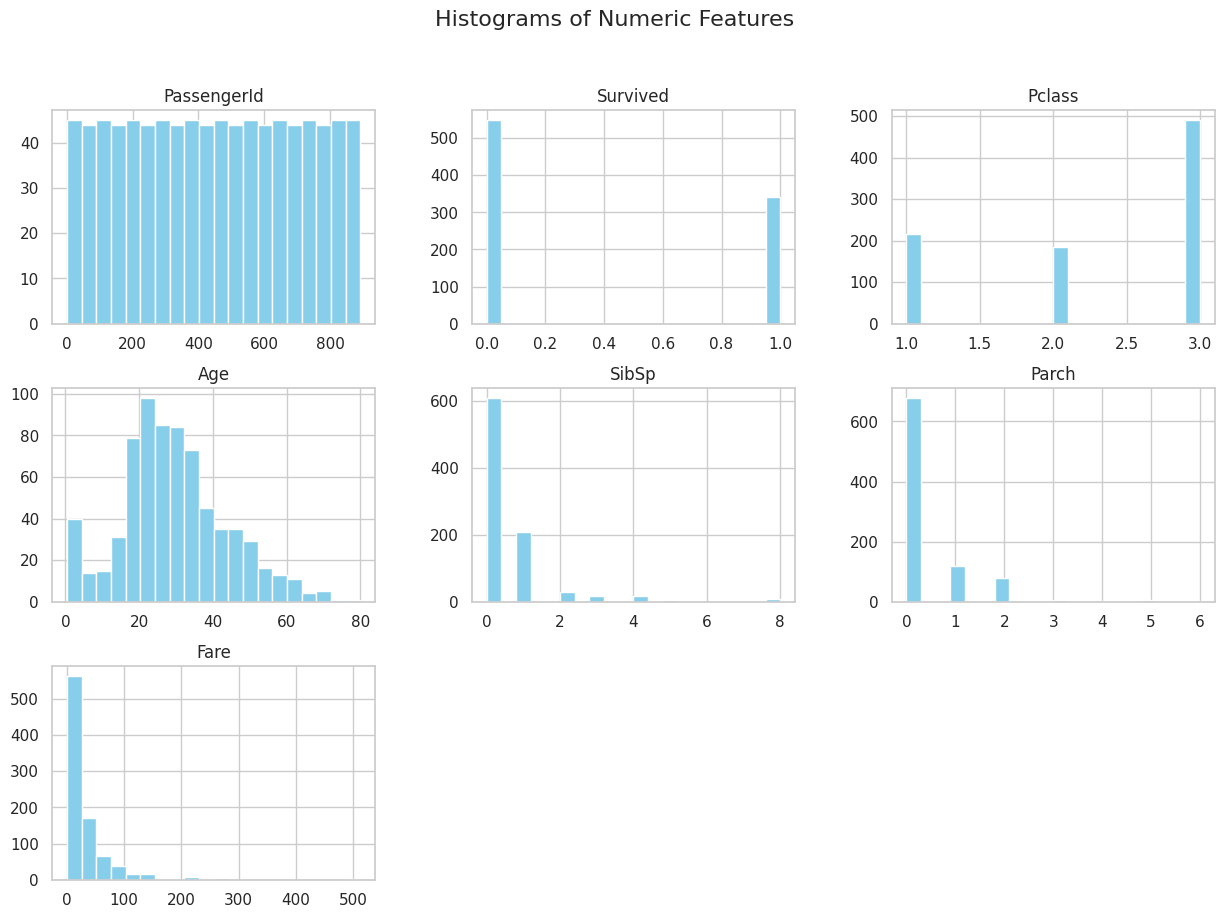

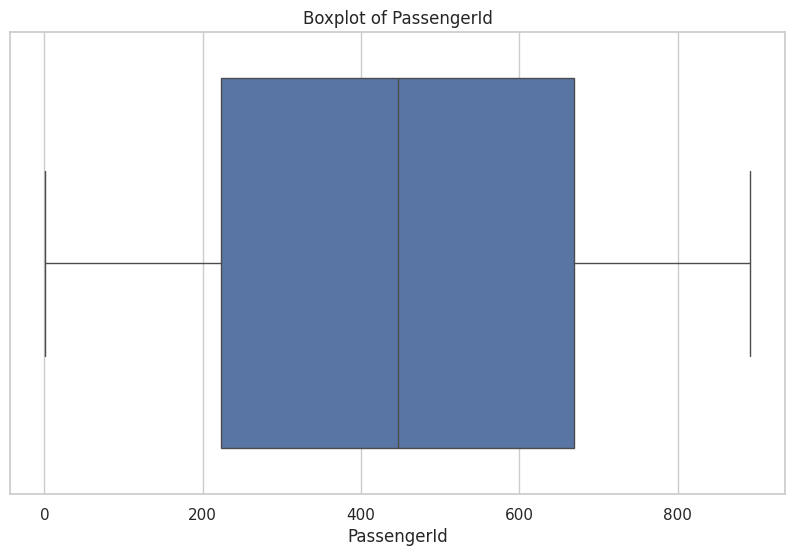

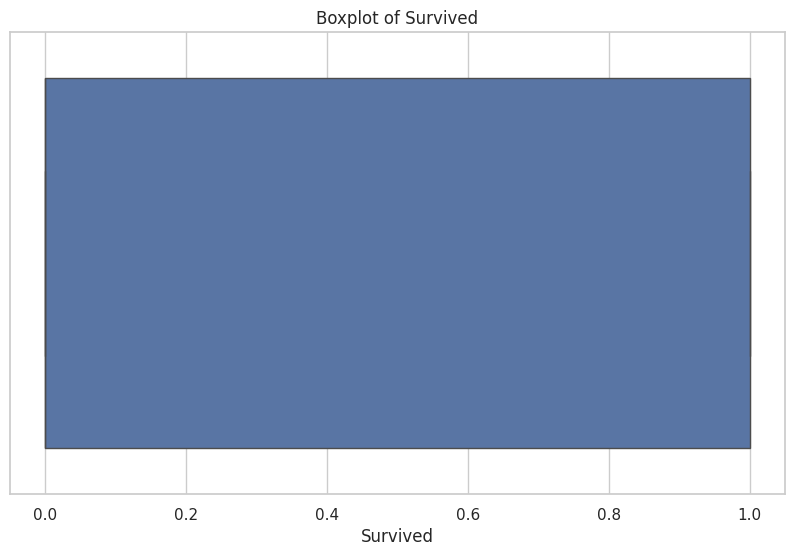

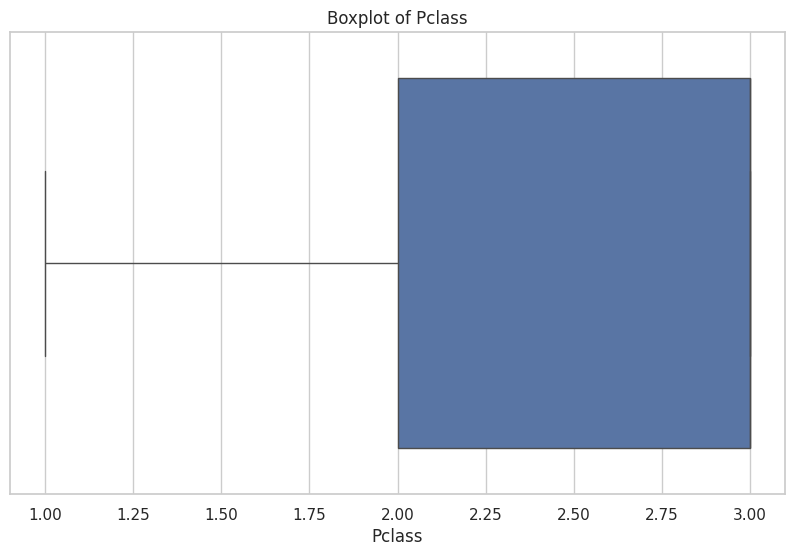

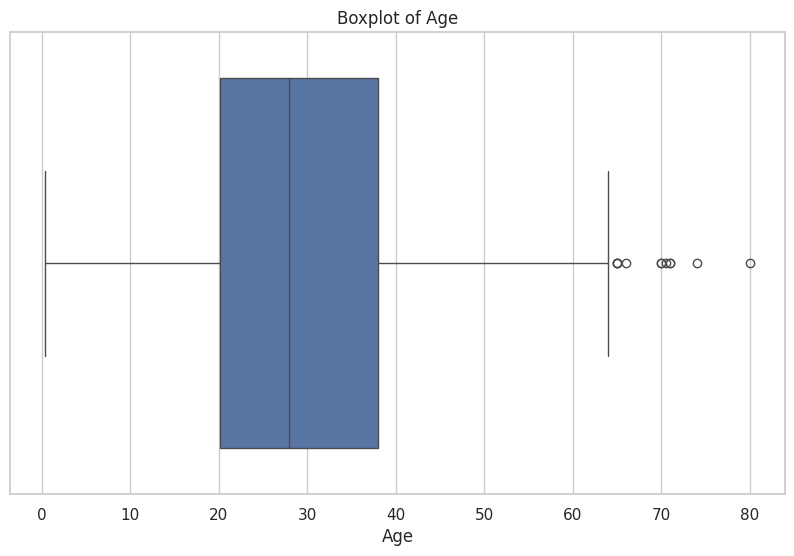

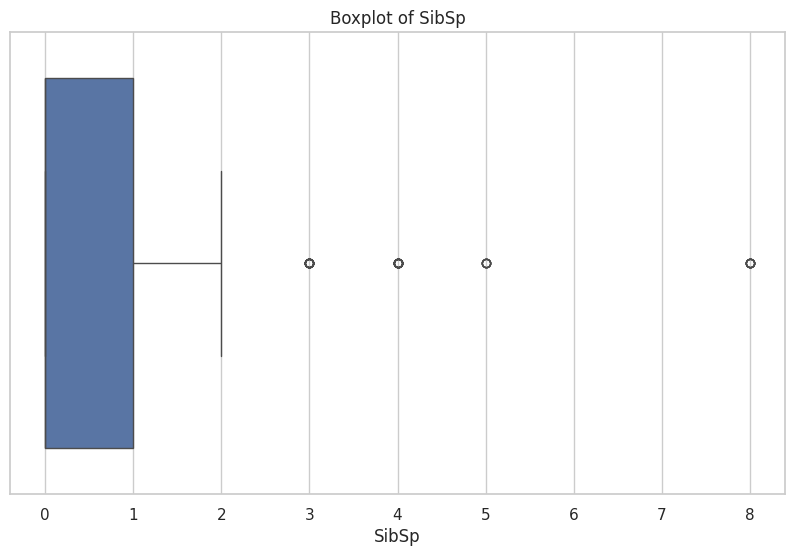

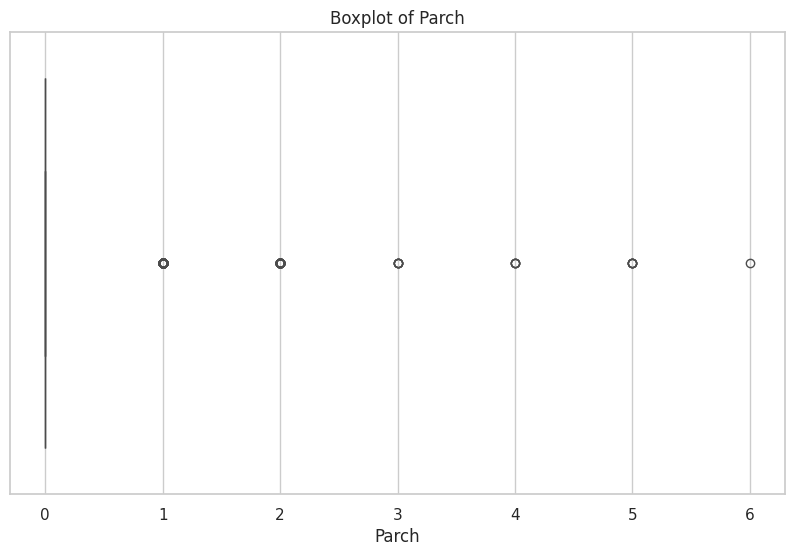

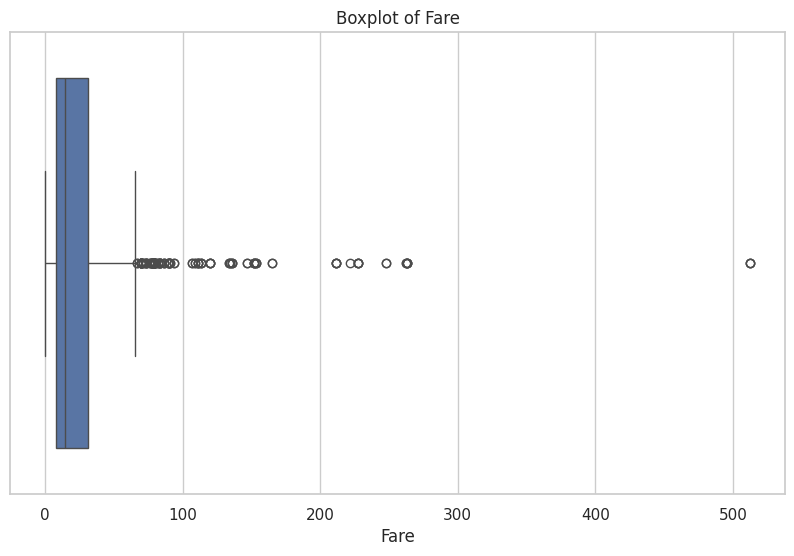

In [4]:
# Histogram of numeric features
df.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

# Boxplots for numeric features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


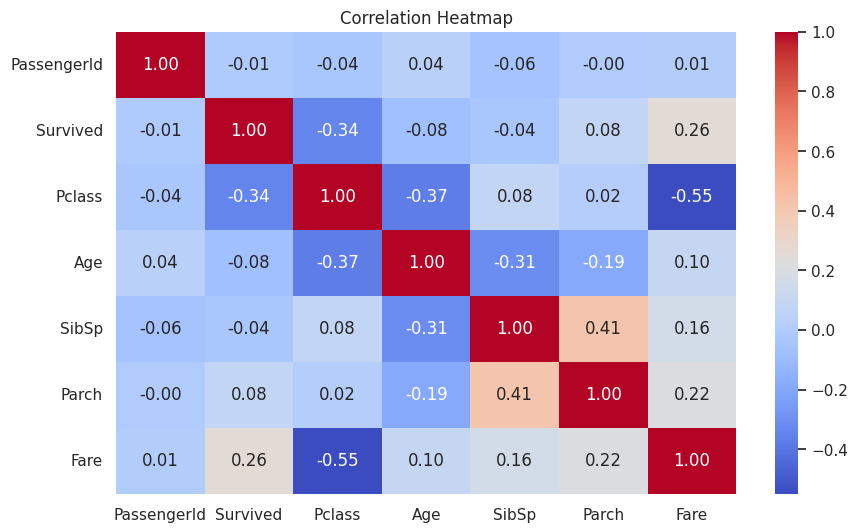

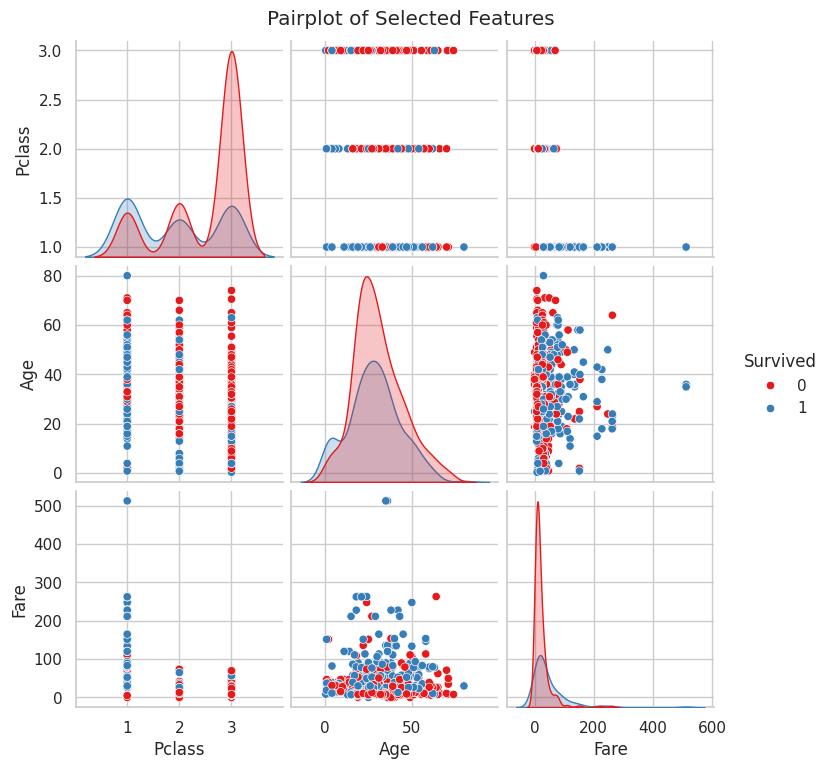

In [6]:
# Correlation matrix
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot (sample for key features to avoid overplotting)
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', palette='Set1')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


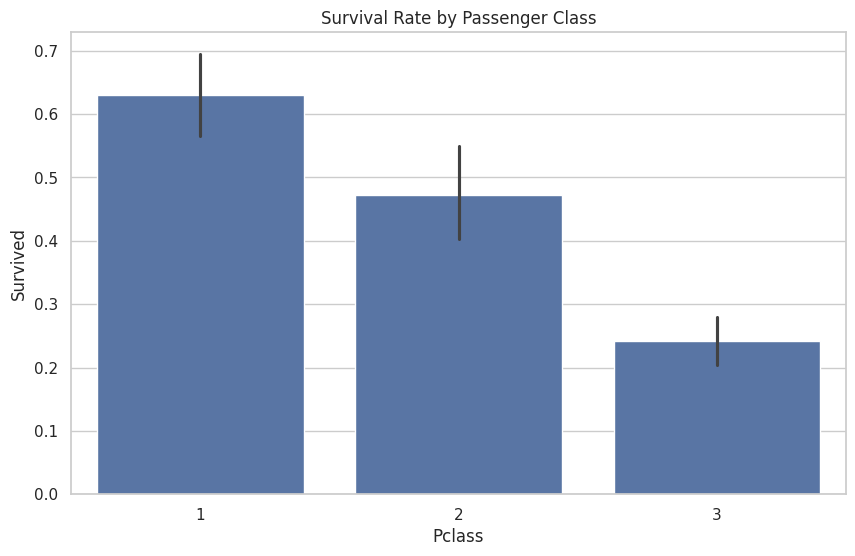

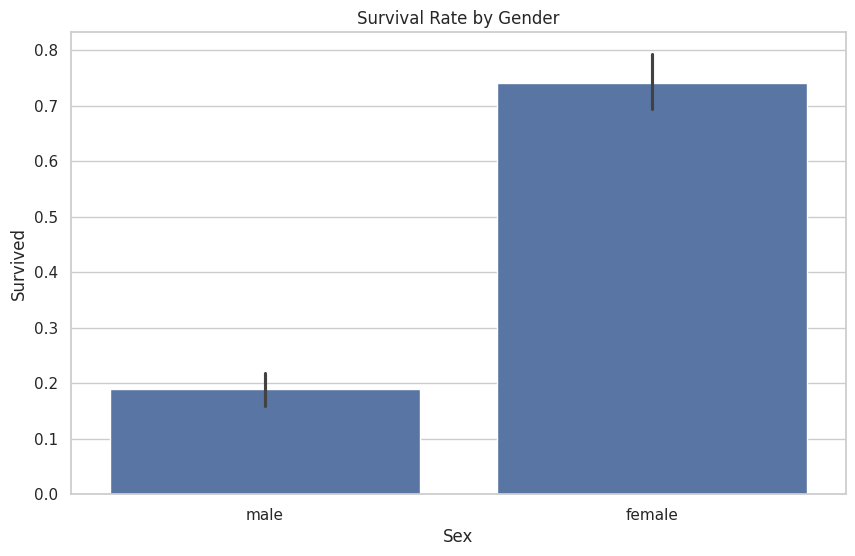

In [7]:
# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Age vs Fare with survival
fig = px.scatter(df, x="Age", y="Fare", color="Survived", title="Age vs Fare Colored by Survival")
fig.show()


In [8]:
# Grouped means
df.groupby('Pclass')['Survived'].mean()

# Median age of survivors vs non-survivors
df.groupby('Survived')['Age'].median()

# Check if any feature has outliers
for col in ['Age', 'Fare']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} has {outliers.shape[0]} outliers.")


Age has 11 outliers.
Fare has 116 outliers.


In [9]:
# Pattern Analysis & Inferences
print("\n=== 📌 Observations & Inferences ===")

# 1. Fare Analysis
if 'Fare' in df.columns:
    high_fare = df['Fare'].quantile(0.75)
    print(f"- 💰 Passengers who paid more than ₹{high_fare:.2f} typically belonged to higher classes (Pclass 1) and had a higher survival rate.")

# 2. Age Analysis
if 'Age' in df.columns:
    median_age = df['Age'].median()
    print(f"- 👶 The median age is {median_age:.1f} years. Younger passengers (especially children) had better chances of survival.")

# 3. Survival by Class
if 'Survived' in df.columns and 'Pclass' in df.columns:
    survival_by_class = df.groupby('Pclass')['Survived'].mean()
    print("- 🛳️ Survival Rate by Passenger Class:")
    for cls, rate in survival_by_class.items():
        print(f"  * Class {cls}: {rate:.2%} survived")

# 4. Survival by Gender
if 'Sex' in df.columns and 'Survived' in df.columns:
    survival_by_gender = df.groupby('Sex')['Survived'].mean()
    print("- 🚻 Survival Rate by Gender:")
    for gender, rate in survival_by_gender.items():
        print(f"  * {gender.capitalize()}: {rate:.2%} survived")

print("\n✅ EDA complete. Visual insights are displayed above. Use these inferences to guide feature selection and modeling.")



=== 📌 Observations & Inferences ===
- 💰 Passengers who paid more than ₹31.00 typically belonged to higher classes (Pclass 1) and had a higher survival rate.
- 👶 The median age is 28.0 years. Younger passengers (especially children) had better chances of survival.
- 🛳️ Survival Rate by Passenger Class:
  * Class 1: 62.96% survived
  * Class 2: 47.28% survived
  * Class 3: 24.24% survived
- 🚻 Survival Rate by Gender:
  * Female: 74.20% survived
  * Male: 18.89% survived

✅ EDA complete. Visual insights are displayed above. Use these inferences to guide feature selection and modeling.
